## In this session, we will read time series data using Pandas, understand how decomposition models work and time series frequency can be modified 

### importing required libraries

In [1]:
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

# Reading time series

## Example 1

In [2]:
df1=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])
df1.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


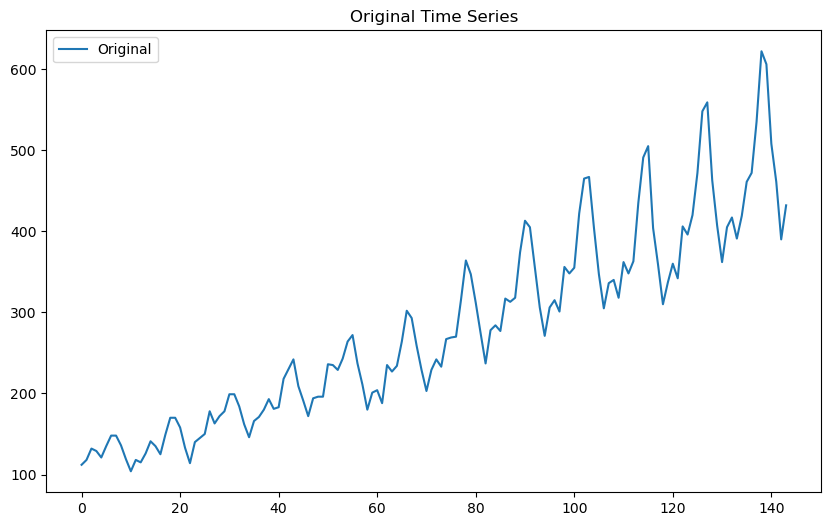

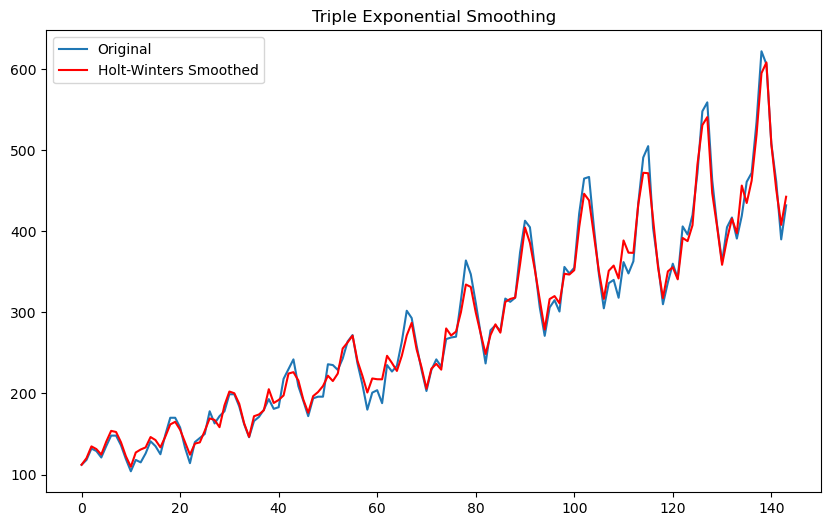

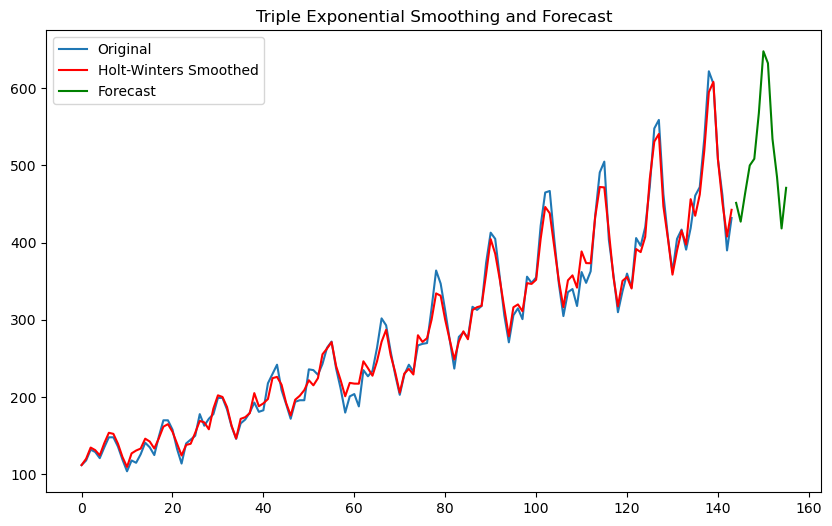

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series data
data = pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])
y = data['Pax']  # replace 'value_column' with your column name

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.title('Original Time Series')
plt.legend()
plt.show()

# Apply Triple Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit()
y_hat = model.fittedvalues

# Plot the original and smoothed series
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.plot(y_hat, label='Holt-Winters Smoothed', color='red')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

# Forecasting the next steps
forecast = model.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original')
plt.plot(y_hat, label='Holt-Winters Smoothed', color='red')
plt.plot(forecast, label='Forecast', color='green')
plt.title('Triple Exponential Smoothing and Forecast')
plt.legend()
plt.show()


checking datatypes

In [4]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
result = adfuller(y)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


## Example 3

In [5]:
import pandas as pd

# Assuming 'y' is your time series data
y_diff = y.diff().dropna()  # First order differencing to make the series stationary

# Perform the ADF test on the differenced series
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(y_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print(f'{key}: {value}')

ADF Statistic (Differenced): -2.829266824169992
p-value (Differenced): 0.0542132902838265
Critical Values (Differenced):
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [6]:
result=adfuller(df1.Pax)
result




(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [7]:
print('ADFstats:',result[0])
print('pvalue:',result[1])

ADFstats: 0.8153688792060597
pvalue: 0.9918802434376411


In [8]:
df1['rollmean']=df1.Pax.rolling(window=12).mean()
df1['rollstd']=df1.Pax.rolling(window=12).std()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Pax'>

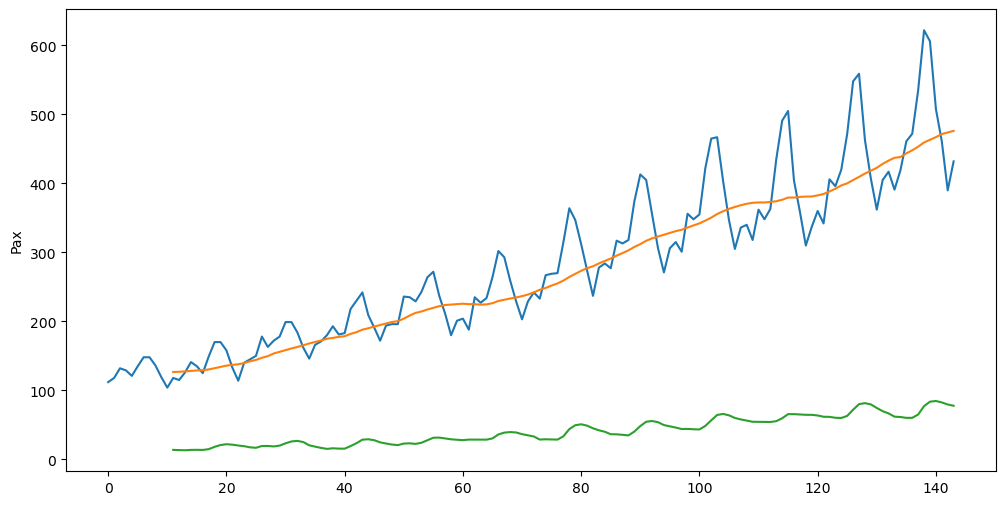

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1,x=df1.index,y=df1.Pax)
sns.lineplot(data=df1,x=df1.index,y=df1.rollmean)
sns.lineplot(data=df1,x=df1.index,y=df1.rollstd)

data is recorder for the period of 1982 through 1992 on quarterly basis

converting above data into time series

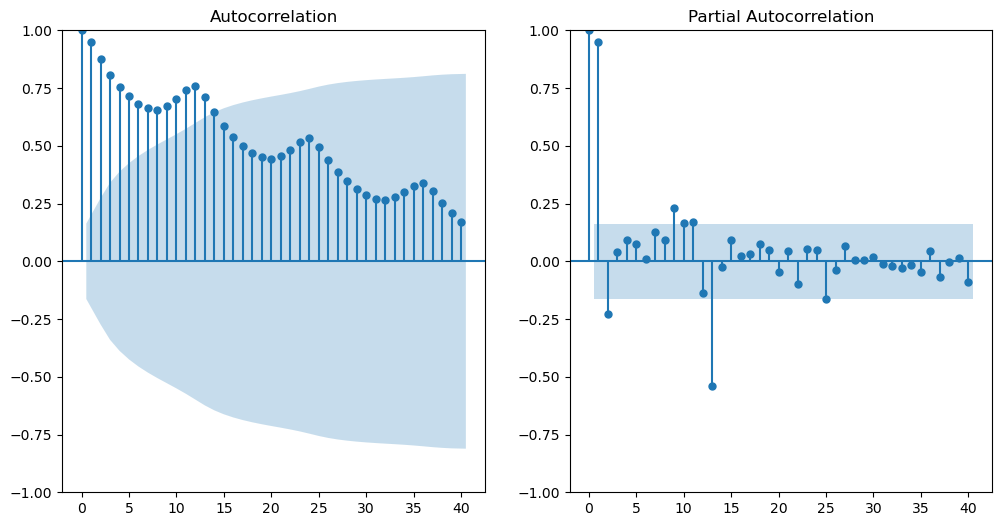

In [10]:
#above data is not stationary 
#HOW TO MAKE IT STATIONARY 
# Plot ACF and PACF to identify the order of the model
plt.figure(figsize=(12, 6))
plt.subplot(121)
sm.graphics.tsa.plot_acf(y, lags=40, ax=plt.gca())
plt.subplot(122)
sm.graphics.tsa.plot_pacf(y, lags=40, ax=plt.gca())
plt.show()


In [15]:
df1.head()

,Year-Month,Pax,rollmean,rollstd
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,NaN,NaN
2,1949-03-01,132,NaN,NaN
3,1949-04-01,129,NaN,NaN
4,1949-05-01,121,NaN,NaN


In [23]:
df=df1.drop(['rollmean','rollstd'],inplace=True,axis=1)

KeyError: "['rollmean', 'rollstd'] not found in axis"

In [26]:
df1['shift1']=df1.Pax.shift()

In [32]:
df1['diff']=df1['Pax'] - df1['shift1']

In [38]:
def stationary(df,var):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df,x=df1.index,y=df1.var)
    sns.lineplot(data=df,x=df1.index,y=df1.var)
    sns.lineplot(data=df,x=df1.index,y=df1.var)

<IPython.core.display.Javascript object>

TypeError: Invalid object type at position 0

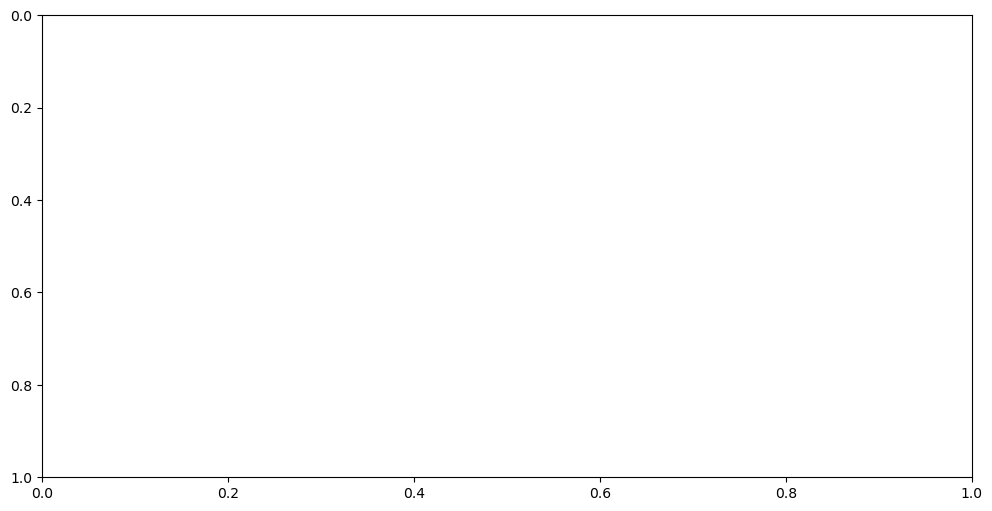

In [43]:
stationary(df1,'diff')

<IPython.core.display.Javascript object>

TypeError: Invalid object type at position 0

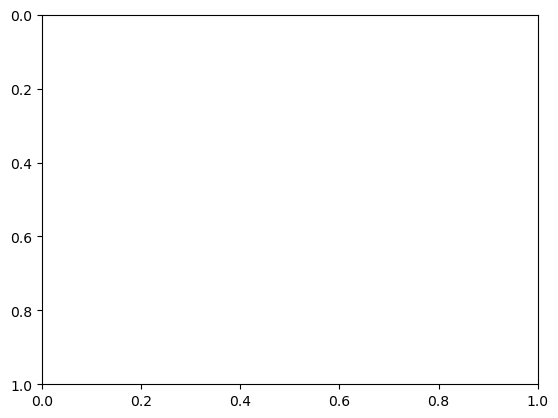

In [41]:
sns.lineplot(data=df,x=df1.index,y=df1.var)
sns.lineplot(data=df,x=df1.index,y=df1.var)
sns.lineplot(data=df,x=df1.index,y=df1.var)

In [45]:
df1

,Year-Month,Pax,shift1,diff
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,112.0,6.0
2,1949-03-01,132,118.0,14.0
3,1949-04-01,129,132.0,-3.0
4,1949-05-01,121,129.0,-8.0
...,...,...,...,...
139,1960-08-01,606,622.0,-16.0
140,1960-09-01,508,606.0,-98.0
141,1960-10-01,461,508.0,-47.0
142,1960-11-01,390,461.0,-71.0


In [58]:
log_df=df1[['Pax']]
log_df
df1['log']=np.log(log_df['Pax'])

In [59]:
df1

,Year-Month,Pax,shift1,diff,log
0,1949-01-01,112,NaN,NaN,4.718499
1,1949-02-01,118,112.0,6.0,4.770685
2,1949-03-01,132,118.0,14.0,4.882802
3,1949-04-01,129,132.0,-3.0,4.859812
4,1949-05-01,121,129.0,-8.0,4.795791
...,...,...,...,...,...
139,1960-08-01,606,622.0,-16.0,6.406880
140,1960-09-01,508,606.0,-98.0,6.230481
141,1960-10-01,461,508.0,-47.0,6.133398
142,1960-11-01,390,461.0,-71.0,5.966147


In [57]:
log_df

,Pax,log
0,112,4.718499
1,118,4.770685
2,132,4.882802
3,129,4.859812
4,121,4.795791
...,...,...
139,606,6.406880
140,508,6.230481
141,461,6.133398
142,390,5.966147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='rollmean'>

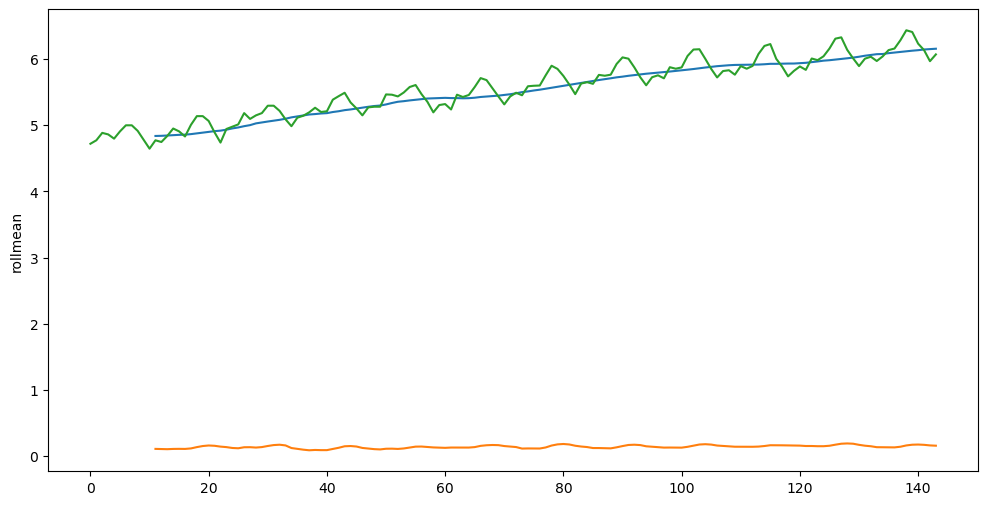

In [64]:
df1['rollmean']=df1.log.rolling(window=12).mean()
df1['rollstd']=df1.log.rolling(window=12).std()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x=df1.index,y=df1.rollmean)
sns.lineplot(data=df,x=df1.index,y=df1.rollstd)
sns.lineplot(data=df,x=df1.index,y=df1.log)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='rollmean'>

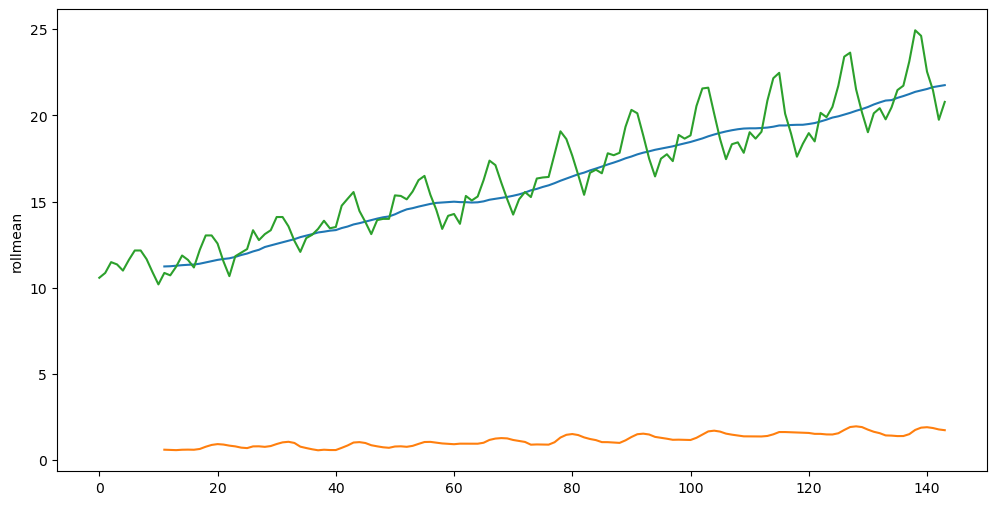

In [68]:
df1['sqrt']=np.sqrt(df1.Pax)
df1['rollmean']=df1.sqrt.rolling(window=12).mean()
df1['rollstd']=df1.sqrt.rolling(window=12).std()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x=df1.index,y=df1.rollmean)
sns.lineplot(data=df,x=df1.index,y=df1.rollstd)
sns.lineplot(data=df,x=df1.index,y=df1.sqrt)

In [ ]:
df1['rollmean']=df1.sqrt.rolling(window=12).mean()
df1['rollstd']=df1.sqrt.rolling(window=12).std()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x=df1.index,y=df1.rollmean)
sns.lineplot(data=df,x=df1.index,y=df1.rollstd)
sns.lineplot(data=df,x=df1.index,y=df1.sqrt)

In [73]:
df=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [75]:
df['diff1']=df.Pax.diff()

In [93]:
df['diff12']=df.Pax.diff(12)
df.set_index('Year-Month',inplace=True)

KeyError: "None of ['Year-Month'] are in the columns"

In [113]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

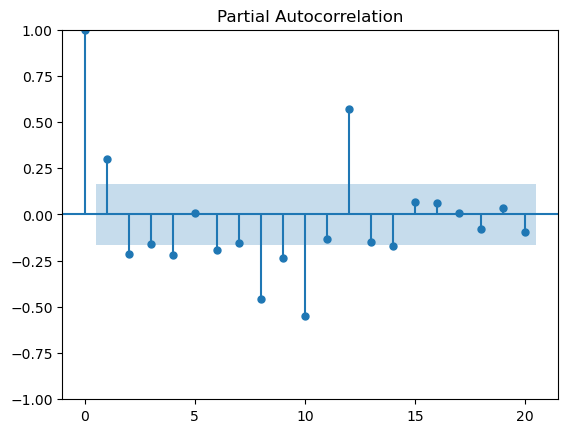

In [95]:
plot_pacf(df['diff1'].dropna(),lags=20);


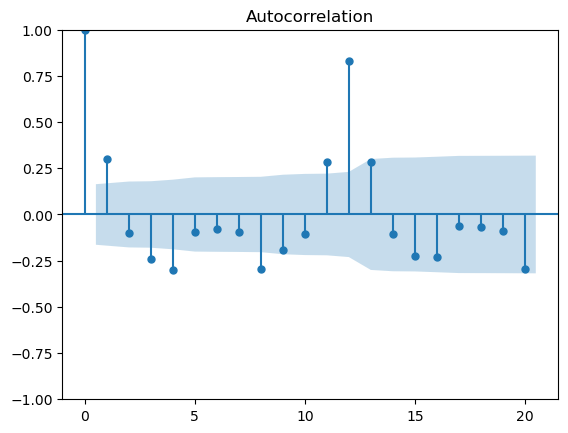

In [96]:
plot_acf(df['diff1'].dropna(),lags=20);

In [104]:
train=df[:round(len(df)*70/100)]
train.head()

,Pax,diff1,diff12
Year-Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [108]:
test=df[round(len(df)*70/100):]

In [109]:
test.head()

,Pax,diff1,diff12
Year-Month,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [116]:
model=ARIMA(train['Pax'],order=(1,1,3))

C:\Program Files\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Program Files\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
model_fit=model.fit()
predict=model.predict(start=test.index[0],end=test.index[-1])

TypeError: Model.predict() missing 1 required positional argument: 'params'

In [ ]:
predict=model